<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/0_assignment_yourname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Multiple Regression for Flight Delay Prediction
## Objective
The goal is to build a multiple regression model to predict flight arrival delays using two independent variables: departure delay and weather. We will learn how to use the formula feature in `statsmodels` to explicitly set a baseline for a categorical variable ('Weather').
#
### Steps:
1.  **Connect to Database & Engineer Variables:** Write an SQL query to calculate `departure_delay` and retrieve `weather_condition` data.
2.  **Data Cleaning:** Remove null values and extreme outliers to improve model stability.
3.  **Build the Multiple Regression Model:** Create the model using `departure_delay` and `weather_condition` as independent variables, setting 'Clear' as the baseline for weather.
4.  **Analyze the Results:** Check the model's statistical significance and the impact of each variable on arrival delay.
5.  **Visualize the Results:** Use `seaborn` to visually analyze the model's performance and the effect of weather.


In [ ]:
!pip install pymysql

In [ ]:
# Step 0: Import necessary libraries
import pymysql
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages for cleaner output


## Step 1: Connect to DB and Load Data
We connect to the database and load data from the flights_delay table which contains all the engineered features we need.


In [ ]:
# Create a direct connection to the database
conn = pymysql.connect(
    host='database-klee.cbgcswckszgl.us-east-1.rds.amazonaws.com',
    user='erau',
    password='1212',
    database='airline_db',
    charset='utf8mb4'
)

# Query data from the flights_delay table
query = """
SELECT
    flight_id,
    departure_delay_mins,
    delay_minutes AS arrival_delay_mins,
    weather_condition,
    day_of_week,
    aircraft_type,
    airline_code
FROM
    flights_delay
WHERE
    departure_delay_mins IS NOT NULL
    AND delay_minutes IS NOT NULL
    AND weather_condition IS NOT NULL;
"""

# Execute the query and load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [ ]:
df.head()

,flight_id,departure_delay_mins,arrival_delay_mins,weather_condition,day_of_week,aircraft_type,airline_code
0,1,6,22,Clear,Saturday,A330-300,DL
1,2,20,62,Snow,Sunday,A330-300,OZ
2,3,12,28,Rain,Monday,A350-900,EK
3,4,8,15,Cloudy,Monday,A350-900,NH
4,5,15,27,Clear,Monday,B787-9,OZ


## Step 2: Data Cleaning and Preparation
We clean the data by removing any missing values and filtering out extreme outliers, which could negatively impact the model's predictive power.


In [ ]:
# Check for missing values before cleaning
print("Missing values per column:")
print(df.isnull().sum())

# Only drop rows with missing values in critical columns
df_cleaned = df.dropna(subset=['departure_delay_mins', 'arrival_delay_mins', 'weather_condition'])

# Use cleaned dataset for further analysis
df_cleaned

Missing values per column:
flight_id               0
departure_delay_mins    0
arrival_delay_mins      0
weather_condition       0
day_of_week             0
aircraft_type           0
airline_code            0
dtype: int64


,flight_id,departure_delay_mins,arrival_delay_mins,weather_condition,day_of_week,aircraft_type,airline_code
0,1,6,22,Clear,Saturday,A330-300,DL
1,2,20,62,Snow,Sunday,A330-300,OZ
2,3,12,28,Rain,Monday,A350-900,EK
3,4,8,15,Cloudy,Monday,A350-900,NH
4,5,15,27,Clear,Monday,B787-9,OZ
...,...,...,...,...,...,...,...
495,496,4,1,Clear,Thursday,B787-9,LH
496,497,0,0,Cloudy,Friday,B787-9,SQ
497,498,9,15,Clear,Tuesday,A380-800,OZ
498,499,29,60,Thunderstorm,Wednesday,B737-MAX,JL


## Step 3: Build the Multiple Regression Model
Build the multiple regression model using `smf.ols`.

dv: arrival_delay_mins ivs: departure_delay_mins,weather_condition

Inside the formula, Use the syntax `C(weather_condition, Treatment(reference='Clear'))` to explicitly set 'Clear' as the baseline category for weather.


In [ ]:
# Q1 - Build the model using 'Clear' as the reference category (note the capital C)



## Step 4: Review and Interpret the Results
The model summary will show the coefficient for `departure_delay_mins` as well as the additional impact of other weather conditions compared to 'Clear' weather.


In [ ]:
# Q2 - Print the regression results summary




## Step 5: Visualize the Results
We analyze the model with two visualizations:
1.  A scatter plot comparing the actual and predicted values to check the overall predictive power of the model.
2.  A bar chart comparing the average arrival delay for each weather condition.


In [ ]:
# 1. Visualize the overall model fit (Actual vs. Predicted)
df_cleaned['predicted_delay'] = results.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted_delay', y='arrival_delay_mins', data=df_cleaned)
plt.plot([df_cleaned['arrival_delay_mins'].min(), df_cleaned['arrival_delay_mins'].max()],
         [df_cleaned['arrival_delay_mins'].min(), df_cleaned['arrival_delay_mins'].max()],'r--', lw=2)


Text(0, 0.5, 'Average Arrival Delay (minutes)')

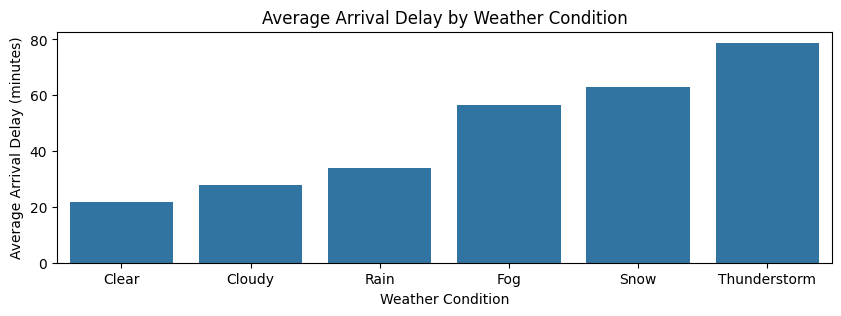

In [ ]:
# 2. Visualize the effect of weather condition on arrival delay
plt.figure(figsize=(10, 3))
weather_means = df_cleaned.groupby('weather_condition')['arrival_delay_mins'].mean().sort_values()
sns.barplot(x=weather_means.index, y=weather_means.values)
plt.title('Average Arrival Delay by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Arrival Delay (minutes)')


In [ ]:
# Print summary statistics by weather condition
df_cleaned.groupby('weather_condition')['arrival_delay_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_condition,,,,,,,,
Clear,223.0,21.695067,23.563912,0.0,4.5,16.0,30.50,133.0
Cloudy,123.0,27.894309,21.812094,0.0,12.5,25.0,37.00,99.0
Fog,43.0,56.604651,23.216517,11.0,41.5,55.0,71.00,112.0
Rain,71.0,33.957746,17.072481,0.0,22.5,32.0,44.00,79.0
Snow,28.0,62.964286,12.200432,40.0,52.0,62.0,72.25,90.0
Thunderstorm,12.0,78.833333,24.964824,51.0,58.5,73.0,99.00,115.0
